<a href="https://colab.research.google.com/github/shubhvash/lazyprogrammer-colab-notebooks/blob/main/TF2_0_Linear_Regression_Mooore_Law_(v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-03-27 13:20:41--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-03-27 13:20:41 (37.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [20]:
data = pd.read_csv('moore.csv', header=None).values
print(type(data))
print(data.shape)
X = data[:,0].reshape(-1,1)
Y = data[:,1]

<class 'numpy.ndarray'>
(162, 2)


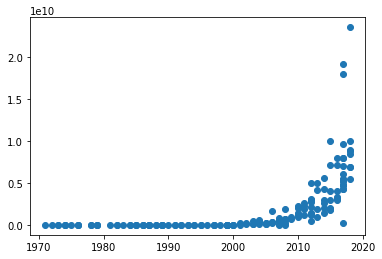

In [21]:
plt.scatter(X, Y)

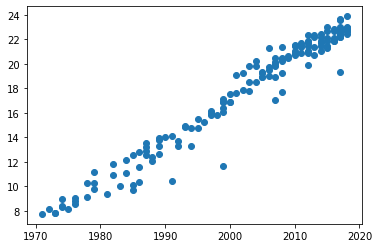

In [22]:
Y = np.log(Y)
plt.scatter(X, Y)

In [23]:
X = X - X.mean()

In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 333.8042 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 281.7523 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 244.4657 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 226.8218 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 238.1343 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 219.8245 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 172.0804 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 114.6795 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 59.6971 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 48.2127 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss:

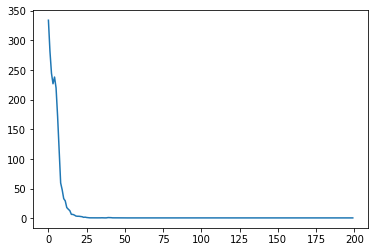

In [26]:
plt.plot(r.history['loss'], label='loss')

In [28]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3315093]], dtype=float32), array([17.767788], dtype=float32)]


In [29]:
a = model.layers[0].get_weights()[0][0,0]

In [30]:
print("Time to double: ", np.log(2) / a)

Time to double:  2.0908831125527465


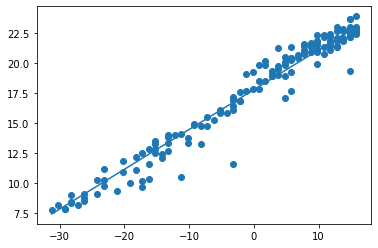

In [31]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [32]:
w, b = model.layers[0].get_weights()
X = X.reshape(-1,1)
Yhat2 = (X.dot(w) + b).flatten()
np.allclose(Yhat, Yhat2)

True